In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
dataset = pd.read_csv('Position_Salaries.csv').values

In [40]:
# X: 두번째 열(Level, 직급)
# y: 세번째 열(Salary)
# 직급에 따라 salary를 예측(결정)하는 모델

X = dataset[:,1].reshape(-1,1)
# 1. 두번째 열만 선택 후, 2D array로 변경: dataset[:,1].reshape(-1,1)
# 2. 첫번째 열을 제외, 두번째 열부터 마지막 열 앞에까지 (두번째 열만 선택 2D array)
#    : dataset[:,1:-1]
y = dataset[:,-1]
print(X.shape, y.shape)

(10, 1) (10,)


In [41]:
# training과 test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7, 1) (3, 1) (7,) (3,)


### Polynomial feature로 X 확장

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
# PolynomialFeatures 객체 생성(이름 선언), 확장할 degree 파라미터 지정
poly.fit(X_train)
# polynomial로 확장하기 위해 필요한 정보 수집
X_train_poly = poly.transform(X_train)
print('변환 전')
print(X_train)
print('변환 후')
print(X_train_poly)

변환 전
[[5]
 [1]
 [4]
 [2]
 [8]
 [9]
 [6]]
변환 후
[[1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]]


In [43]:
# polynomial features로 확장한 후, linear regression 적용
from sklearn.linear_model import LinearRegression
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly,y_train)

LinearRegression()

In [44]:
# test data에 대한 예측값
# poly_lr은 PolynomialFeatures로 확장된 X를 이용하여 학습하였기 때문에
# test data도 동일한 형식으로 확장해야 함
X_test_poly = poly.transform(X_test)
# X_test data에 대해서 fit은 다시 수행하지 않음
y_pred = poly_lr.predict(X_test_poly)

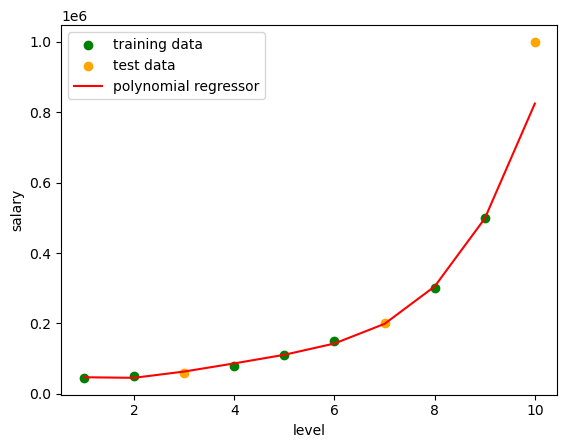

In [45]:
# 시각화
# 결과 시각화
plt.scatter(X_train,y_train,color='green',label='training data')
plt.scatter(X_test,y_test,label='test data',color='orange')

level = np.arange(1,11,1).reshape(-1,1)
level_poly = poly.transform(level)
salary = poly_lr.predict(level_poly)

# poly_lr model을 선차트로 시각화
plt.plot(level,salary,color='red',label='polynomial regressor')
plt.xlabel('level')
plt.ylabel('salary')
plt.legend()